In [ ]:
# Use dataset: https://www.kaggle.com/datasets/ruchikakumbhar/power-consumption-prediction-dataset This dataset is
# related to power consumption of three different distribution networks of Tetouan city which is located in north
# Morocco.

In [3]:
from hw2_modules import (DataLoader, EdaAnalyze)
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [13]:
data_load = DataLoader('./power_consumption_data/power_consumption.csv', 'csv')
dataset = data_load.get_data()  # load the data into a Pandas DataFrame
pcom = EdaAnalyze(dataset)
print('************************************')
print('power consumption dataset info')
print(pcom.info())
print('************************************')

con = sqlite3.connect('pcom.db')
cursor = con.cursor()
table_name = 'power_consumption'

key_create_db = False
key_convert_data = False

if key_create_db:
    # Create Table in DB
    request = f"""CREATE TABLE IF NOT EXISTS {table_name}
                (id INTEGER PRIMARY KEY AUTOINCREMENT,  
                DateTime DATETIME, 
                Temperature REAL,
                Humidity REAL,
                Wind_Speed REAL,
                general_diffuse_flows REAL,
                diffuse_flows REAL,
                Zone_1 REAL,
                Zone_2 REAL,
                Zone_3 REAL                                                                                                
                )
            """
    cursor.execute(request)

if key_convert_data:
    # convert the DataFrame data to a sqlite table
    dataset.to_sql(table_name, con, if_exists='fail', index=True, index_label='id')

request_select = f'SELECT * FROM {table_name} WHERE `DateTime` < "01-01-2017 06:10" AND `Humidity` > 78'

date_select = cursor.execute(request_select).fetchall()
print(request_select)
for item in date_select:
    print(item)
print('************************************')

request_select = f'SELECT AVG(Humidity) FROM {table_name}'
date_select = cursor.execute(request_select).fetchone()
print(request_select, ': ', date_select[0])
request_select = f'SELECT AVG(Zone_1) FROM {table_name}'
date_select = cursor.execute(request_select).fetchone()
print(request_select, ': ', date_select[0])
print('************************************')

request_select = f'SELECT ROUND(SUM(Zone_2),2) FROM {table_name} WHERE `DateTime` > "12-01-2017 00:01" AND `Wind_Speed` < 0.071'
date_select = cursor.execute(request_select).fetchone()
print(request_select, ': ', date_select[0])
print('************************************')

request_select = f'SELECT COUNT(*) FROM {table_name} WHERE `DateTime` > "12-01-2017 00:01" AND `Wind_Speed` < 0.071'
date_select = cursor.execute(request_select).fetchone()
print(request_select, ': ', date_select[0])
print('************************************')

request_select = f'SELECT ROUND(Temperature,0), COUNT(*) FROM {table_name} GROUP BY ROUND(Temperature,0)'
date_select = cursor.execute(request_select).fetchall()
print(request_select)
for item in date_select:
    print(item)
print('************************************')

# read from DB to pandas DataFrame

request_select = f'SELECT * FROM {table_name}'
pcd_sql = pd.read_sql(request_select, con)

pcd_sql.info()
pcd_sql.head()


************************************
power consumption dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind_Speed             52416 non-null  float64
 4   general_diffuse_flows  52416 non-null  float64
 5   diffuse_flows          52416 non-null  float64
 6   Zone_1                 52416 non-null  float64
 7   Zone_2                 52416 non-null  float64
 8   Zone_3                 52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None
************************************
SELECT * FROM power_consumption WHERE `DateTime` < "01-01-2017 06:10" AND `Humidity` > 78
(7, '01-01-2017 01:10', 5.496, 78.2, 0.085, 0.055, 0.093, 25446.0759

,id,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1,Zone_2,Zone_3
0,0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [15]:
# Convert DataTime to datatime format
pcd_sql['DateTime'] = pd.to_datetime(pcd_sql['DateTime'], format='mixed', errors='coerce')

def parse_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        for fmt in ['%Y-%m-%d %H:%M:%S', '%m/%d/%Y %H:%M']:
            try:
                return pd.to_datetime(x, format=fmt)
            except:
                continue
    return pd.NaT

pcd_sql['DateTime'] = pcd_sql['DateTime'].apply(parse_datetime)
pcd_sql.head()

,id,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1,Zone_2,Zone_3
0,0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
# Visualisation

In [23]:
def zone(dataframe_obj: DataFrame, zone_name: str):
    plt.figure(figsize=(15, 8))
    
    daily_avg = dataframe_obj.resample('D', on='DateTime')[zone_name].mean()
    
    plt.plot(daily_avg.index, daily_avg.values, color='#2196F3', label='Daily Average', linewidth=1)
    
    rolling_avg = daily_avg.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg.values, color='#E91E63', 
             label='7-day Rolling Average', linewidth=2)
    
    # Customize the plot
    plt.title(f'Power Consumption Over Time - {zone_name}', fontsize=12, pad=15)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Power Consumption', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()

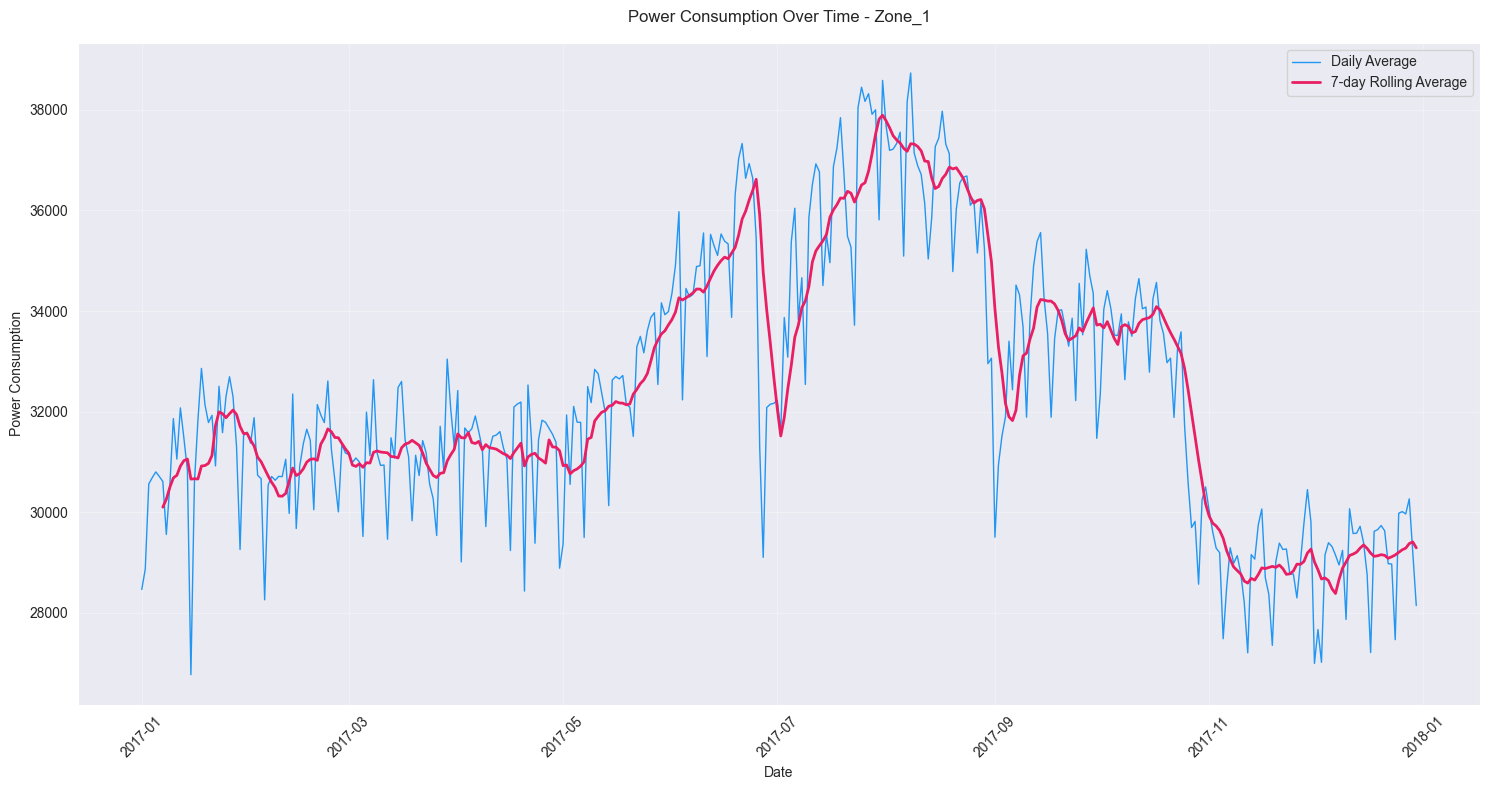

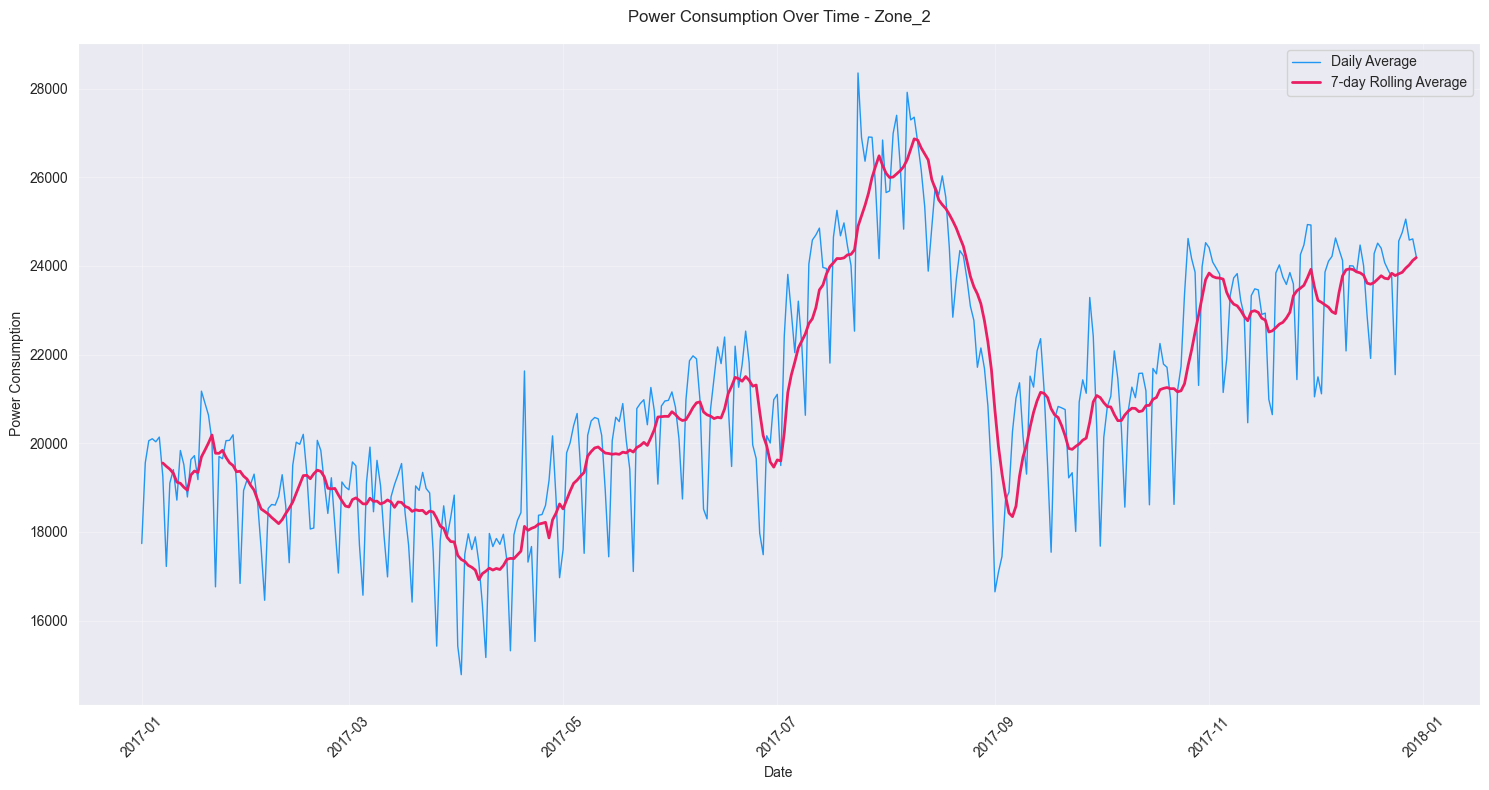

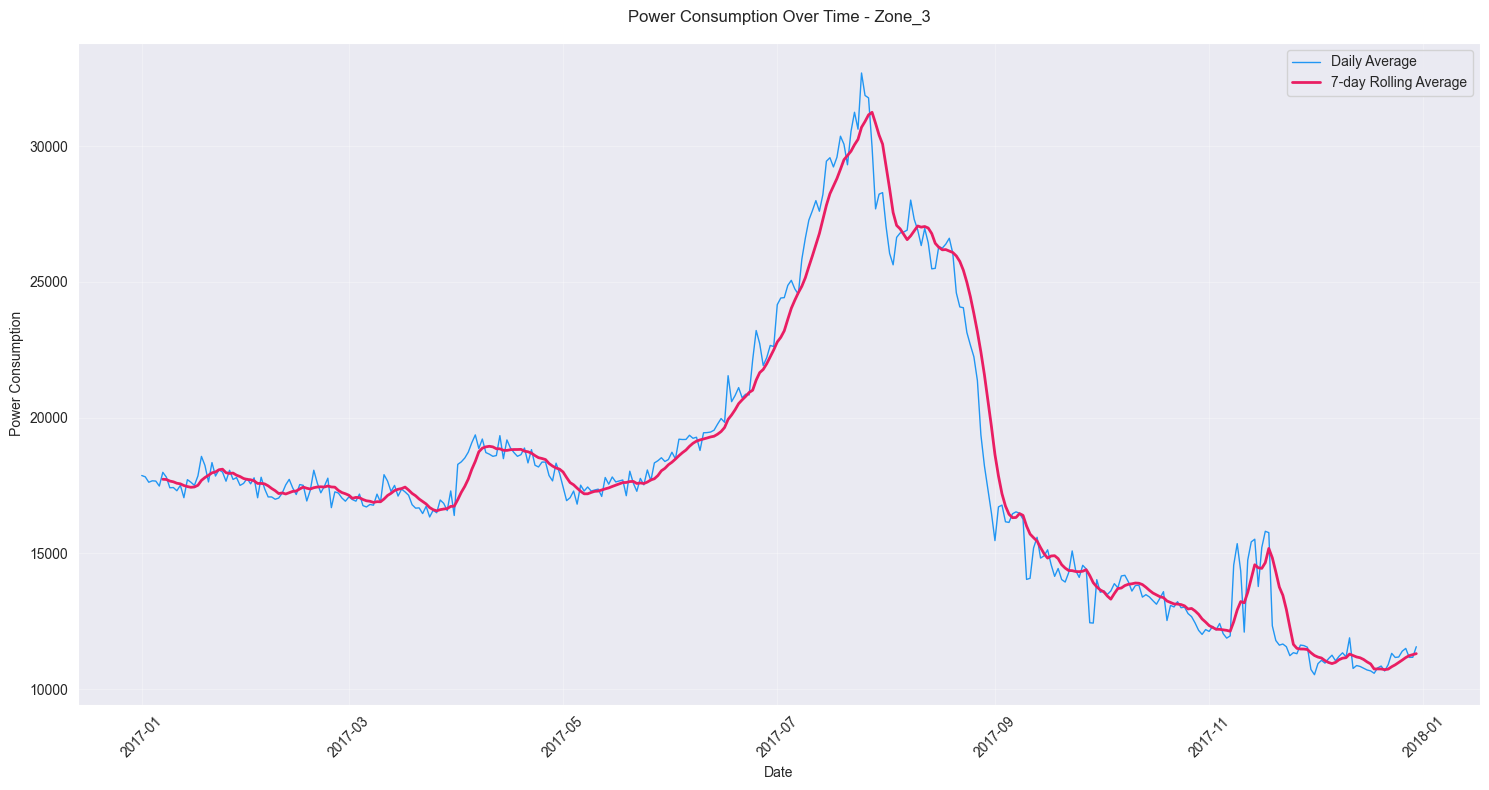

In [57]:
zone(pcd_sql, 'Zone_1')
zone(pcd_sql, 'Zone_2')
zone(pcd_sql, 'Zone_3')

In [31]:
def zone_compare (dataframe_obj: DataFrame):
    plt.figure(figsize=(15, 8))
    
    daily_avg1 = dataframe_obj.resample('D', on='DateTime')['Zone_1'].mean()
    daily_avg2 = dataframe_obj.resample('D', on='DateTime')['Zone_2'].mean()
    daily_avg3 = dataframe_obj.resample('D', on='DateTime')['Zone_3'].mean()
    
    # plt.plot(daily_avg.index, daily_avg.values, color='#2196F3', label='Daily Average', linewidth=1)
    
    
    rolling_avg1 = daily_avg1.rolling(window=7).mean()
    plt.plot(rolling_avg1.index, rolling_avg1.values, color='#2196F3', 
             label='7-day Rolling Average Zone 1', linewidth=2)
    rolling_avg2 = daily_avg2.rolling(window=7).mean()
    plt.plot(rolling_avg2.index, rolling_avg2.values, color='#E9FF63', 
             label='7-day Rolling Average Zone 2', linewidth=2)
    rolling_avg3 = daily_avg3.rolling(window=7).mean()
    plt.plot(rolling_avg3.index, rolling_avg3.values, color='#E91EFF', 
             label='7-day Rolling Average Zone 3', linewidth=2)
    
    
    # Customize the plot
    plt.title('Power Consumption Over Time - 3 Zones', fontsize=12, pad=15)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Power Consumption', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()

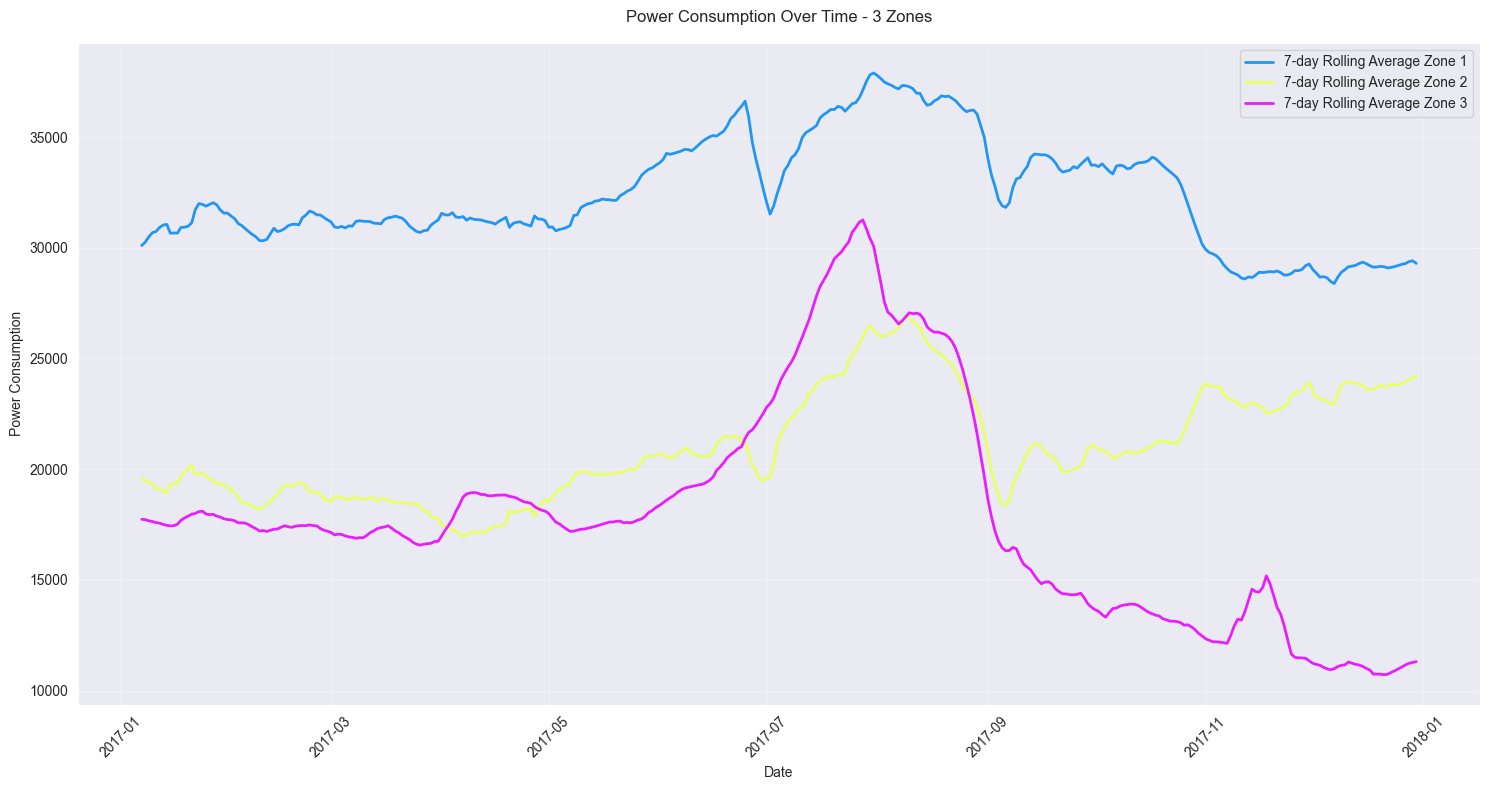

In [56]:
zone_compare(pcd_sql)

In [ ]:
# Temperature vs Power Consumption

In [37]:
def temp(dataframe_obj: DataFrame):
    plt.figure(figsize=(20, 6))
    
    # Zone 1
    plt.subplot(1, 3, 1)
    plt.hexbin(dataframe_obj['Temperature'], dataframe_obj['Zone_1'], 
               gridsize=30, cmap='YlOrRd',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Temperature')
    plt.ylabel('Zone 1')
    plt.title(f'Temperature vs Power Consumption\nZone 1')
    
    # Zone 2
    plt.subplot(1, 3, 2)
    plt.hexbin(dataframe_obj['Temperature'], dataframe_obj['Zone_2'], 
               gridsize=30, cmap='YlOrRd',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Temperature')
    plt.ylabel('Zone 2')
    plt.title(f'Temperature vs Power Consumption\nZone 2')
    
    # Zone 3
    plt.subplot(1, 3, 3)
    plt.hexbin(dataframe_obj['Temperature'], dataframe_obj['Zone_3'], 
               gridsize=30, cmap='YlOrRd',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Temperature')
    plt.ylabel('Zone 3')
    plt.title(f'Temperature vs Power Consumption\nZone 3')
    
    plt.tight_layout()
    plt.show()

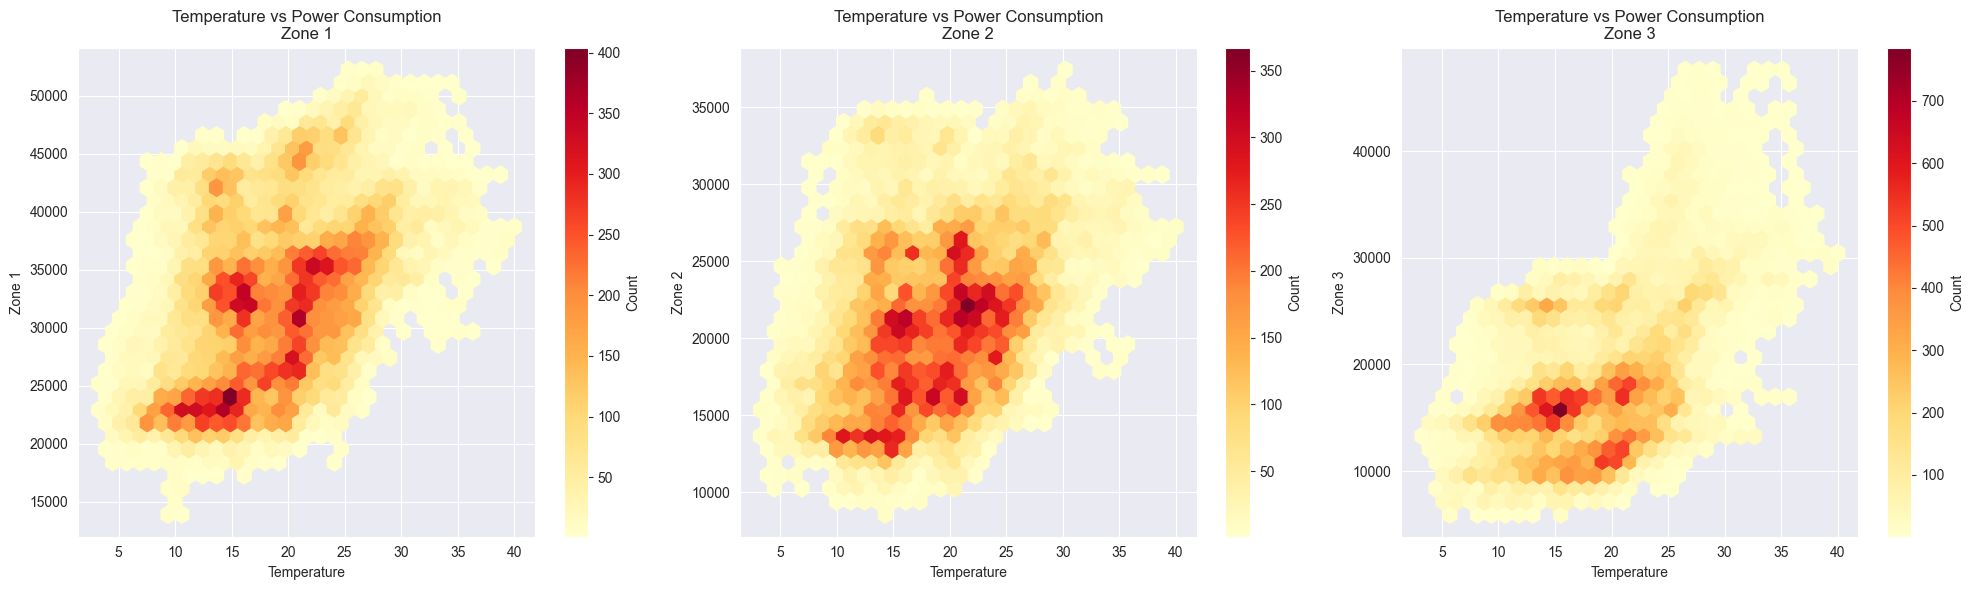

In [51]:
temp(pcd_sql)

In [ ]:
# Humidity vs Power Consumption

In [61]:
def humid(dataframe_obj: DataFrame):
    plt.figure(figsize=(20, 6))
    
    # Zone 1
    plt.subplot(1, 3, 1)
    plt.hexbin(dataframe_obj['Humidity'], dataframe_obj['Zone_1'], 
               gridsize=30, cmap='Spectral',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Humidity')
    plt.ylabel('Zone 1')
    plt.title(f'Humidity vs Power Consumption\nZone 1')
    
    # Zone 2
    plt.subplot(1, 3, 2)
    plt.hexbin(dataframe_obj['Humidity'], dataframe_obj['Zone_2'], 
               gridsize=30, cmap='Spectral',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Humidity')
    plt.ylabel('Zone 2')
    plt.title(f'Humidity vs Power Consumption\nZone 2')
    
    # Zone 3
    plt.subplot(1, 3, 3)
    plt.hexbin(dataframe_obj['Humidity'], dataframe_obj['Zone_3'], 
               gridsize=30, cmap='Spectral',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Humidity')
    plt.ylabel('Zone 3')
    plt.title(f'Humidity vs Power Consumption\nZone 3')
    
    plt.tight_layout()
    plt.show()

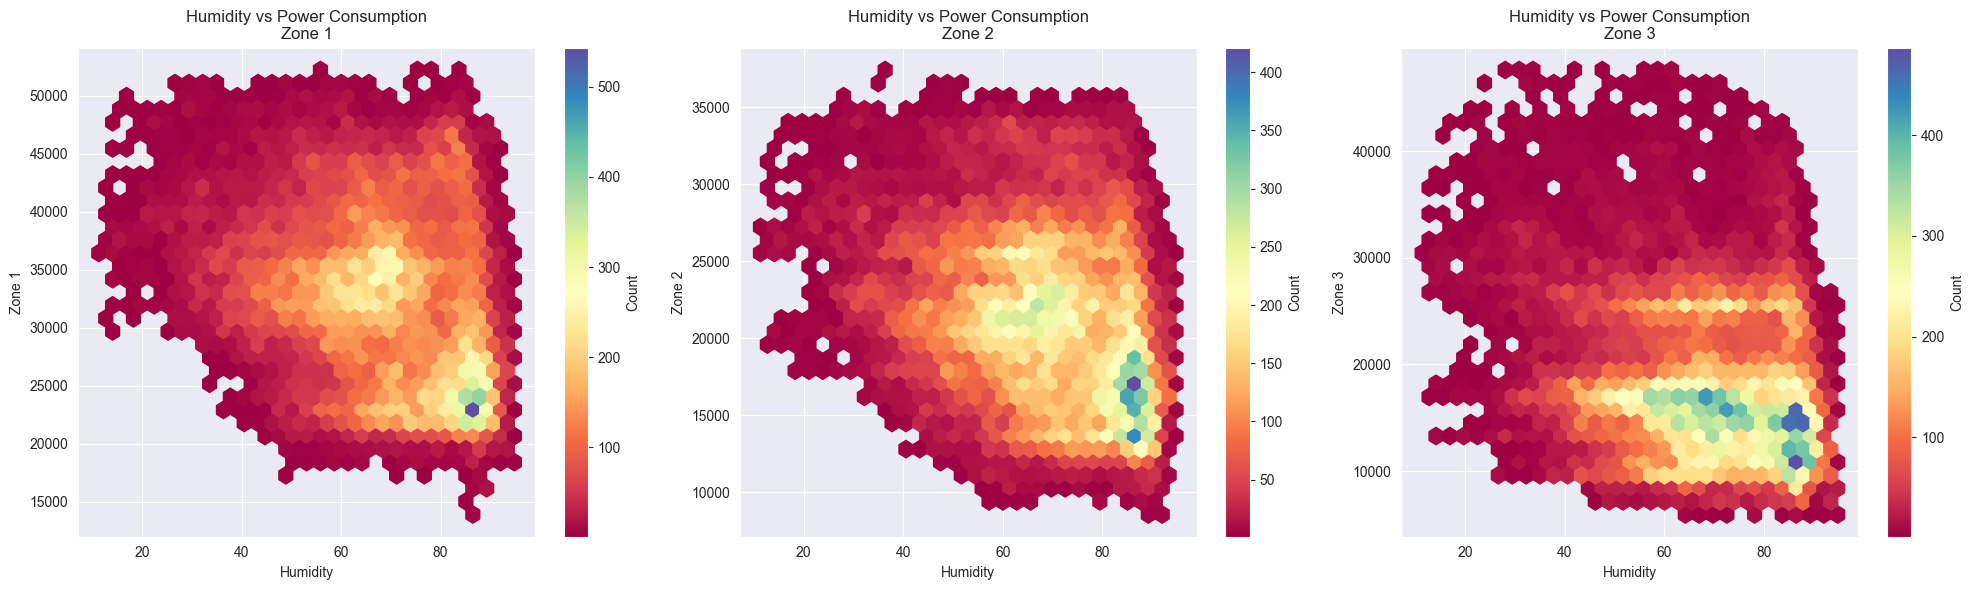

In [62]:
humid(pcd_sql)

In [ ]:
# Wind Speed vs Power Consumption

In [47]:
def wind(dataframe_obj: DataFrame):
    plt.figure(figsize=(20, 6))
    
    # Zone 1
    plt.subplot(1, 3, 1)
    plt.hexbin(dataframe_obj['Wind_Speed'], dataframe_obj['Zone_1'], 
               gridsize=30, cmap='coolwarm',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Wind Speed')
    plt.ylabel('Zone 1')
    plt.title(f'Humidity vs Power Consumption\nZone 1')
    
    # Zone 2
    plt.subplot(1, 3, 2)
    plt.hexbin(dataframe_obj['Wind_Speed'], dataframe_obj['Zone_2'], 
               gridsize=30, cmap='coolwarm',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Wind Speed')
    plt.ylabel('Zone 2')
    plt.title(f'Wind Speed vs Power Consumption\nZone 2')
    
    # Zone 3
    plt.subplot(1, 3, 3)
    plt.hexbin(dataframe_obj['Wind_Speed'], dataframe_obj['Zone_3'], 
               gridsize=30, cmap='coolwarm',
               mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel('Wind Speed')
    plt.ylabel('Zone 3')
    plt.title(f'Wind Speed vs Power Consumption\nZone 3')
    
    plt.tight_layout()
    plt.show()

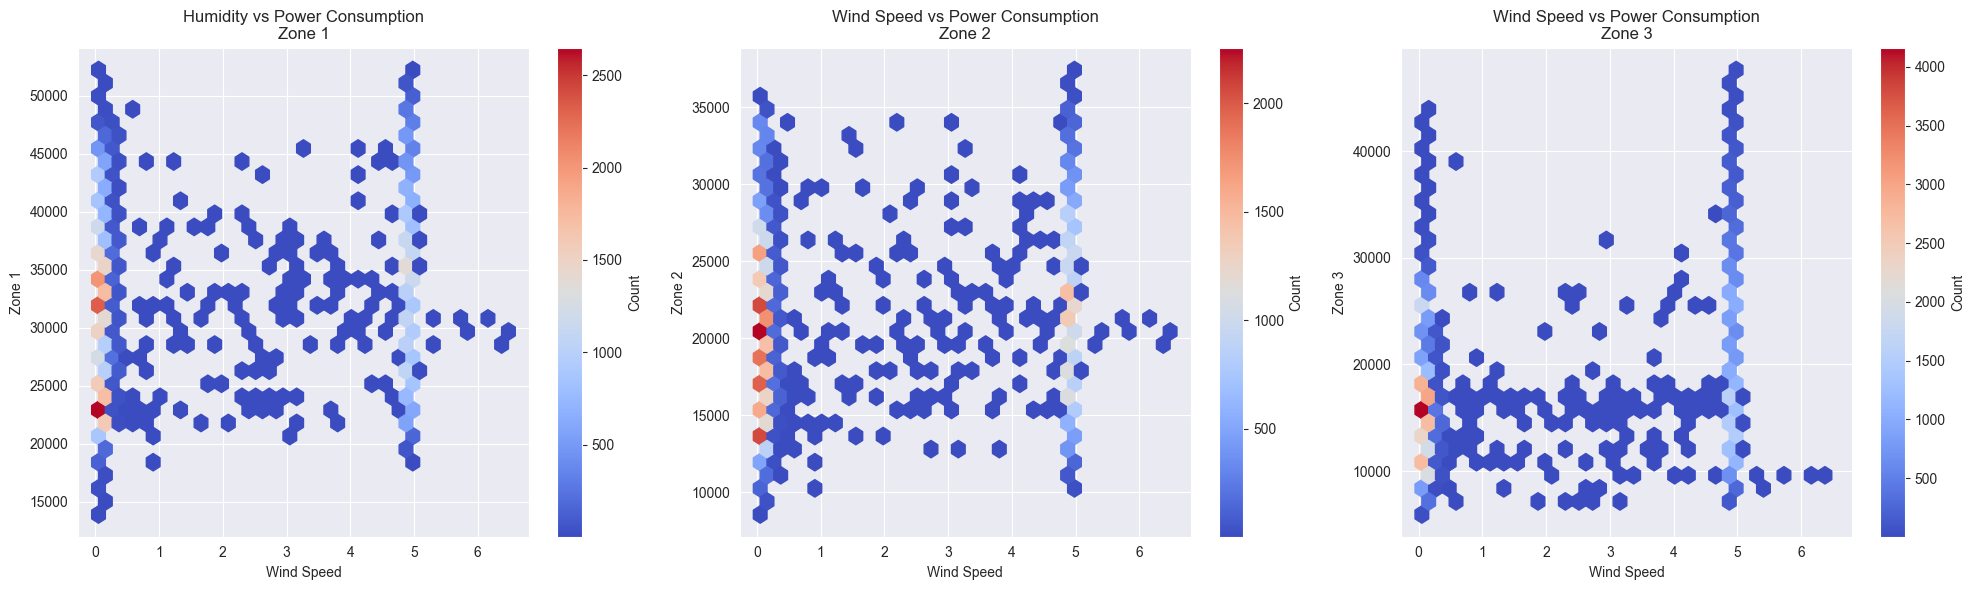

In [53]:
wind(pcd_sql)

In [ ]:
# Correlation Heatmap

In [59]:
def correlation_heatmap(dataframe_obj: DataFrame):
    plt.figure(figsize=(10, 8))
    correlation_vars = ['Temperature', 'Humidity', 'Wind_Speed', 
                       'Zone_1', 'Zone_2', 'Zone_3']
    correlation_matrix = dataframe_obj[correlation_vars].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

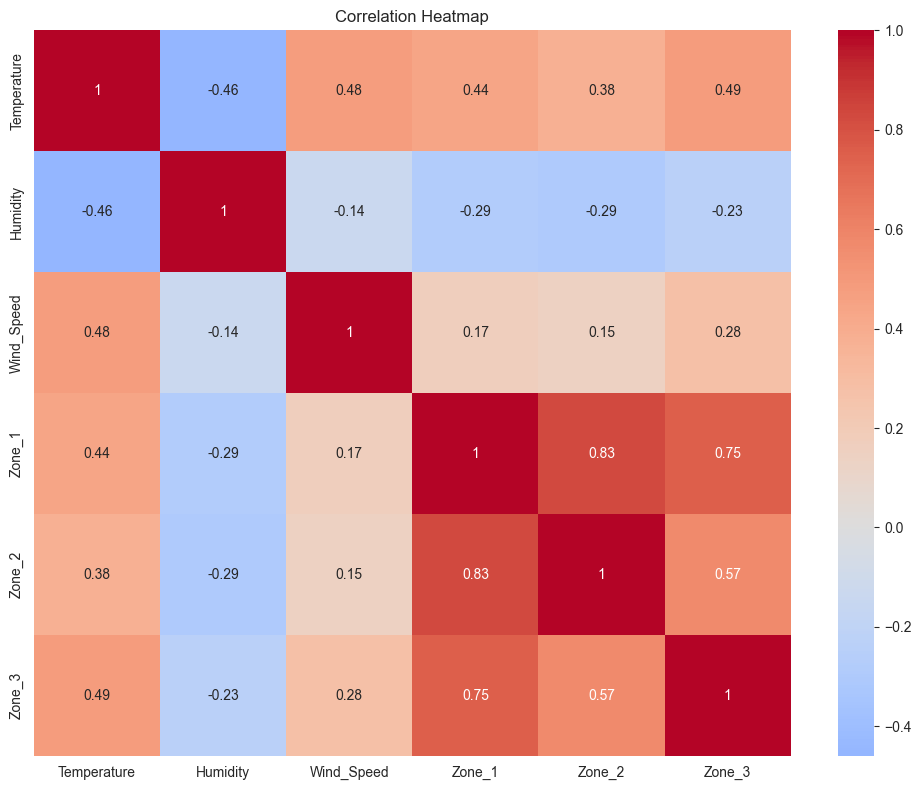

In [60]:
correlation_heatmap(pcd_sql)

<h2>Зависимость температуры от энергопотребления</h2>

Зона 1.
Положительная корреляция между температурой и энергопотреблением.
Наибольшая концентрация данных указывает на температуру от 15°C до 25°C.
Более широкий разброс энергопотребления при более высоких температурах.

Зона 2.
Тенденция аналогична зоне 1, но общее энергопотребление ниже.
Максимальная концентрация составляет от 15°C до 25°C.

Зона 3.
Другая схема: четко выраженный кластер высокого энергопотребления при более низких температурах (от 10°C до 15°C).
Общее потребление ниже, чем в зоне 1.


<h2>Зависимость влажности от энергопотребления</h2>

Зона 1.
Положительная корреляция между влажностью и энергопотреблением.
Наибольшая концентрация данных указывает на влажность от 30% до 60%.
Более широкий разброс энергопотребления при более высокой влажности.

Зона 2.
Тенденция аналогична тенденции в зоне 1, но общее энергопотребление ниже.
Наибольшая концентрация при влажности от 30% до 60%.

Зона 3.
Ярко выраженный кластер с высоким энергопотреблением при более низкой влажности (от 20% до 40%).
Общее потребление ниже, чем в зоне 1.

<h2>Зависимость скорости ветра от энергопотребления</h2>

Зона 1.
Два основных диапазона энергопотребления: один - около 22 000-25 000, а другой - около 30 000-35 000.
Относительно немного данных о более высоких скоростях ветра.

Зона 2.
Аналогичная схема окаймления, но с менее выраженными полосами.
Более широкий разброс значений энергопотребления по сравнению с зоной 1.
Опять же, нет четкой корреляции между скоростью ветра и энергопотреблением.

Зона 3.
Наиболее отчетливые полосы: четкие полосы около 10 000-15 000 и 20 000-25 000.
Как и в зоне 1, при более высоких скоростях ветра наблюдается относительно небольшое количество точек данных.